In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree 


Create dictionary that contains data

In [29]:
training_data = {
   'color': ['Green', 'Yellow', 'Red', 'Red', 'Yellow','Green', 'Yellow', 'Red', 'Red', 'Yellow'],
   'diameter': [3,3,1,1,3,3,4,2,1,3],
   'flavor': ['Sweet','Sweet','Sweet','Sweet','Sour','Sweet','Sweet','Sweet','Sweet','Sour'],
   'label': ['Apple', 'Apple', 'Grape', 'Grape', 'Lemon','Apple', 'Apple', 'Grape', 'Grape', 'Lemon']
}

Turn dictionary into a dataframe

In [30]:
training_df = pd.DataFrame(training_data)
training_df

,color,diameter,flavor,label
0,Green,3,Sweet,Apple
1,Yellow,3,Sweet,Apple
2,Red,1,Sweet,Grape
3,Red,1,Sweet,Grape
4,Yellow,3,Sour,Lemon
5,Green,3,Sweet,Apple
6,Yellow,4,Sweet,Apple
7,Red,2,Sweet,Grape
8,Red,1,Sweet,Grape
9,Yellow,3,Sour,Lemon


Use label encoder to turn categorical data into numbers

In [31]:
le = LabelEncoder()

In [32]:
training_df['color'] = le.fit_transform(training_df['color'])
training_df['label'] = le.fit_transform(training_df['label'])
training_df['flavor']=le.fit_transform(training_df['flavor'])

In [33]:
training_df

,color,diameter,flavor,label
0,0,3,1,0
1,2,3,1,0
2,1,1,1,1
3,1,1,1,1
4,2,3,0,2
5,0,3,1,0
6,2,4,1,0
7,1,2,1,1
8,1,1,1,1
9,2,3,0,2


Separate predictors from what's being predicted 

In [34]:
y = training_df['label']
x = training_df.drop(['label'],axis=1)

In [35]:
x

,color,diameter,flavor
0,0,3,1
1,2,3,1
2,1,1,1
3,1,1,1
4,2,3,0
5,0,3,1
6,2,4,1
7,1,2,1
8,1,1,1
9,2,3,0


In [36]:
y

0    0
1    0
2    1
3    1
4    2
5    0
6    0
7    1
8    1
9    2
Name: label, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split

Separate the training data from the testing data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=4)

Instantiate the model

In [39]:
DT = DecisionTreeClassifier(criterion='entropy')

Fit the model

In [40]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Score the model

In [41]:
DTAcc = DT.score(x_train, y_train)
DTAcc

1.0

Fit and score the model for testing data

In [42]:
DT.fit(x_test,y_test)

DecisionTreeClassifier(criterion='entropy')

In [43]:
DT.score(x_test,y_test)

1.0

Calculate predicted values

In [44]:
y_hat = DT.predict(x_test)

Text representation of the decision tree

In [45]:
text_representation = tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 1.50
|   |--- class: 1
|--- feature_0 >  1.50
|   |--- class: 2



Diagram representation of the decision tree 

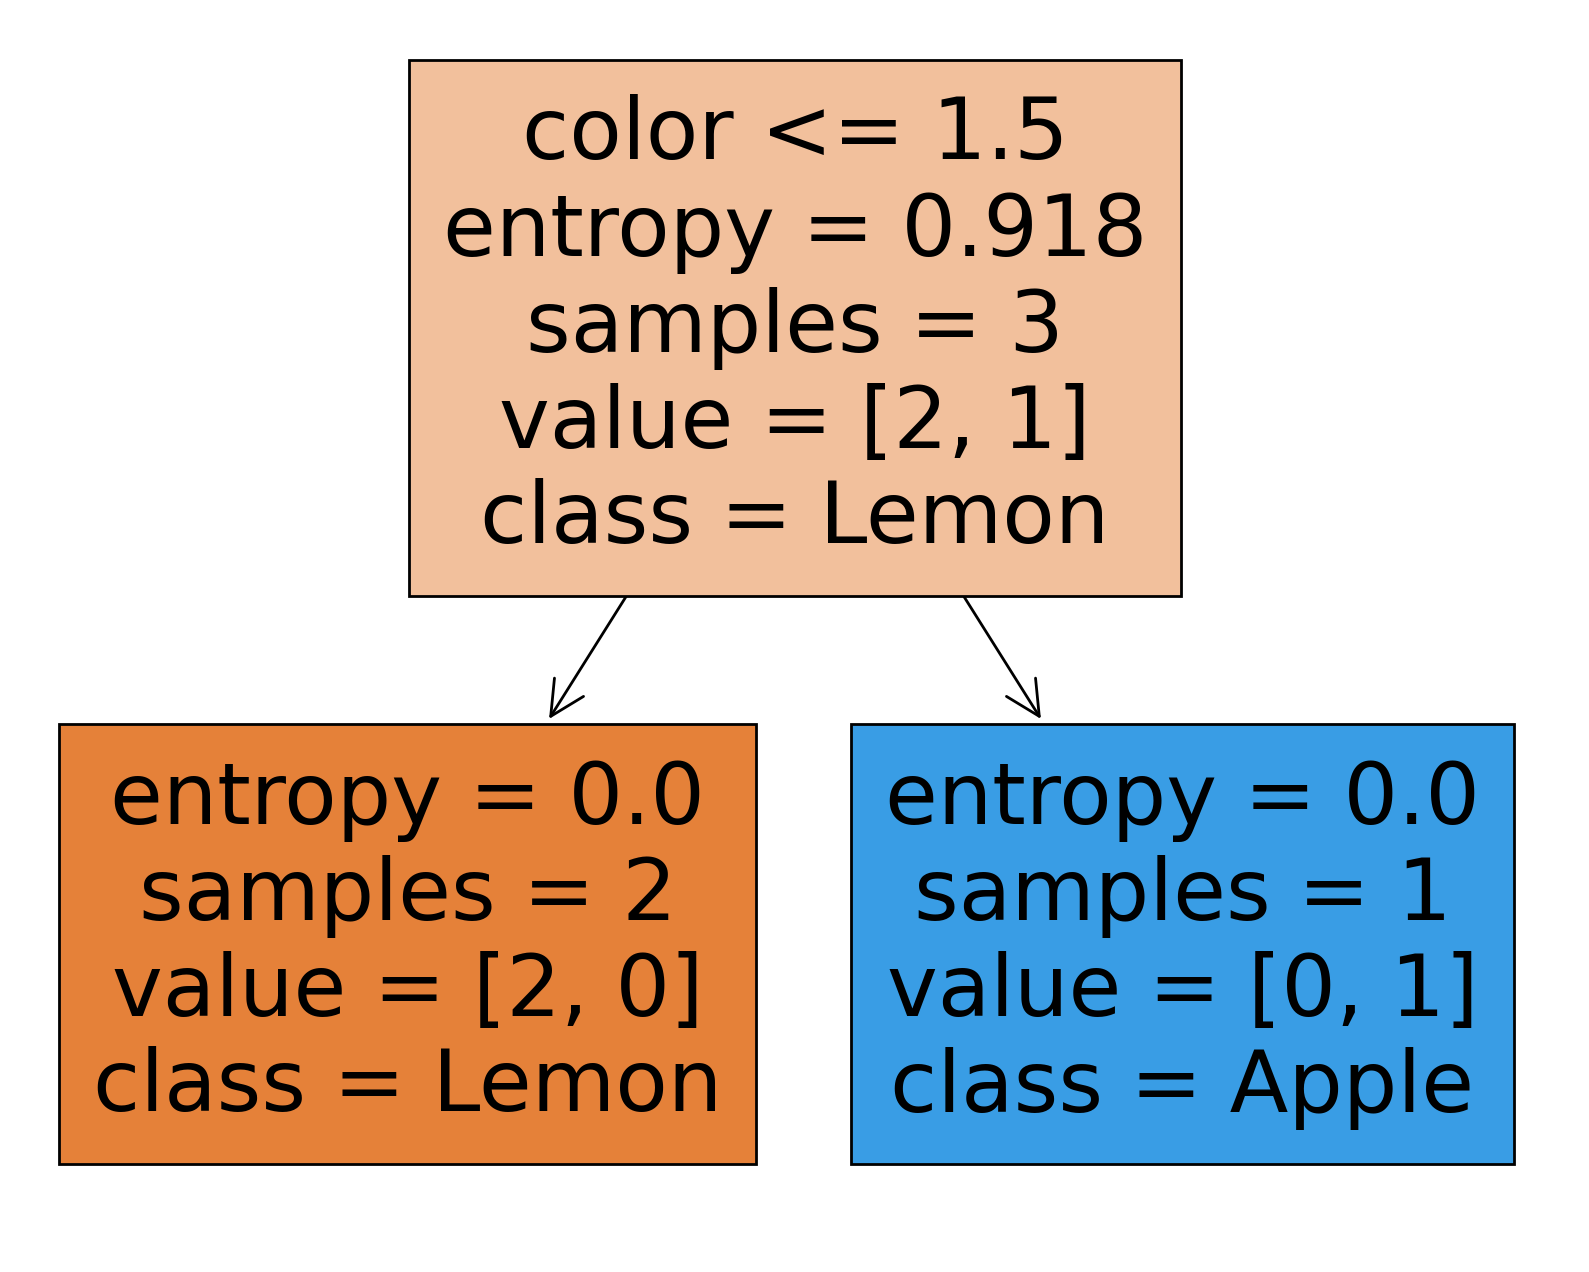

In [46]:
tree.plot_tree(DT,feature_names = training_df.columns, class_names=['Lemon','Apple','Grape'],filled = True);

Comparing actual data with the predicted data

In [47]:
compare = pd.DataFrame({"y_test":y_test,"y_hat": y_hat})
compare

,y_test,y_hat
3,1,1
8,1,1
4,2,2


Compare Decision Tree to Logistic Regression 

In [48]:
from sklearn.linear_model import LogisticRegression

Instantiate the model

In [49]:
lr = LogisticRegression()

Fit the mode

In [50]:
lr.fit(x_train, y_train)

LogisticRegression()

Score the model

In [51]:
LRAcc = lr.score(x_train, y_train)
LRAcc 

0.8571428571428571

Fit and score the model for the testing data 

In [52]:
lr.fit(x_test,y_test)

LogisticRegression()

In [53]:
lr.score(x_test,y_test)

1.0

Create table that compares the accuracy of the two models (focusing on training)

In [54]:
compare = pd.DataFrame({'Model': ['Decision Tree','LogisticRegression'],  
                        'Accuracy': [ DTAcc*100, LRAcc*100]})

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

C:\Users\RachelWalter\AppData\Local\Temp\ipykernel_3404\191893920.py:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})


Model,Accuracy
Decision Tree,100.000000
LogisticRegression,85.714286
